In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Date Frame Creation
We created two data frames. One of our full csv data and the other with just columns that we will use to view which categories have the greatest chances of success.

In [87]:
KickstarterDataset = pd.read_csv("./KSData/ks2018.csv")
kdf = pd.DataFrame(KickstarterDataset)
StateByCatDF = kdf[['main_category', 'state']]

       main_category     state
0         Publishing    failed
1       Film & Video    failed
2       Film & Video    failed
3              Music    failed
4       Film & Video  canceled
...              ...       ...
378656  Film & Video  canceled
378657  Film & Video    failed
378658  Film & Video    failed
378659    Technology    failed
378660           Art    failed

[378661 rows x 2 columns]


I created two different ways to aggregate our data to make our conclusions. The simpler of the two is a pivot table.

In [101]:
#Create a pivot table with the categories as our rows, state as our columns, and then 
#we count how often each term occurs per category
kpt = pd.pivot_table(StateByCatDF, index=["main_category"], columns = ['state'], aggfunc=len)

#This pivot table includes the totals for each category and state
kptTotals = pd.pivot_table(StateByCatDF, index=["main_category"], columns = ['state'], aggfunc=len, margins=True)
print(kptTotals)

state          canceled    failed    live  successful  suspended  undefined  \
main_category                                                                 
Art              2222.0   14131.0   194.0     11510.0       96.0        NaN   
Comics            842.0    4036.0    76.0      5842.0       23.0        NaN   
Crafts            843.0    5703.0    76.0      2115.0       72.0        NaN   
Dance             163.0    1235.0    18.0      2338.0       13.0        1.0   
Design           4152.0   14814.0   305.0     10550.0      247.0        2.0   
Fashion          2650.0   14182.0   250.0      5593.0      138.0        3.0   
Film & Video     5755.0   32904.0   332.0     23623.0      117.0      854.0   
Food             2211.0   15969.0   184.0      6085.0      153.0        NaN   
Games            6202.0   16003.0   287.0     12518.0      220.0        1.0   
Journalism        523.0    3137.0    31.0      1012.0       52.0        NaN   
Music            3305.0   21752.0   281.0     24197.

<AxesSubplot:xlabel='main_category'>

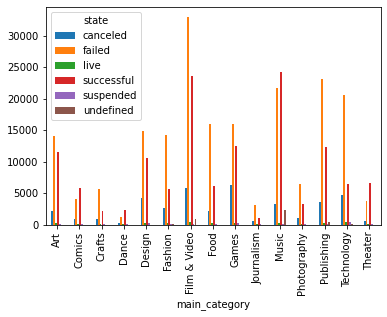

In [100]:
#This bar plot needs to be cleaned up to make it more readable
#Also want to get the percentages of each success per category to find which categories overall are most successful.
kpt.plot(kind='bar')

In [49]:
#Here we create new dataframes where we use the groupby function to aggregate our data instead of using a pivot table.
ByMainCat = kdf.groupby(["main_category","state"]).size()
MainCatLabels = kdf["main_category"].unique()
#Here we set up the labels for when we want to plot the data.
Labels = sorted(MainCatLabels) 
print(ByMainCat)

['Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater']